# Final Project - Explainer Notebook

**FROM PROJECT DESCRIPTION:** The explainer notebook should contain all the behind the scenes data-analysis stuff, details on the dataset, why you've selected these particular visualizations, explanations methodology, etc.

        **--Make sure that you use references when they're needed and follow academic standards--**

## Motivation

**FROM PROJECT DESCRIPTION:** What is your dataset? Why did you choose this/these particular dataset(s)? What was your goal for the end user's experience?

The dataset used in the project is downloaded from https://www.opendata.dk/city-of-copenhagen/trae_basis. The dataset contains all trees (park trees, street trees etc.) which are on the roads of Copenhagen muncipality. The dataset contains 59627 observations (trees) and has 183 features of which many are mostly filled with ``NaN`` values. 

The particular dataset was chosen as the authors of the notebook were very amazed by the visualization of the New York City street trees: https://www.cloudred.com/labprojects/nyctrees/. From the New York City visualization came a curiosity for finding out how the tree types of Copenhagen were distributed across district and what stories could be told about the street trees of Copenhagen.

The end goal was to take the user through the story about the street trees of Copenhagen. The idea is to show how the trees are distributed across the different districts of Copenhagen allowing the user to interact with the visualization and find what kind of trees might be close to the person. Besides this the idea was also to tell a different and original story, to make a seemingly boring dataset come to life and entertain the user.

## Basic Stats

# OBS! Skriv at det KUN er gade træer!

**FROM PROJECT DESCRIPTION:** Write about your choices in data cleaning and preprocessing. Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

This section aims to do introduce and preprocess that data for further analysis.

Usual imports and load of dataset.

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
# Import data
df = pd.read_csv("trae_basis.csv")
df.shape

In [ ]:
pd.set_option('display.max_columns', None) # Show all columns
df.head()

 The dataset thus contains 59.627 trees with 183 features. With this many features a thorough selection is needed to select only the most relevant features, these are listed below:
 
- ``planteaar``, the planting year of the tree.
- ``wkb_geometry``, the coordinates for each tree.
- ``donor``, specifies the donor of a tree if it has any.
- ``trae_historie``, specifies if the tree has any specific history.
- ``botanisk_interesse``, specifies if the tree has a specific botanical interess.
- ``slaegtsnavn``, the family name of the tree.
- ``bydelsnavn``, the name of the city district in which the tree is positioned in.
- ``ejer``, the owners of the tree.
- ``id``, a specific id unique for each tree.

The dataset is therefor limited to only these features.

In [ ]:
focus_features = ['id','slaegtsnavn','bydelsnavn','wkb_geometry','planteaar','donor','trae_historie',
                  'ejer','botanisk_interesse']
df=df[focus_features]
df.head()

Below the feature ``slaegtsnavn`` is looked at.

In [ ]:
traer = df.groupby(['slaegtsnavn']).count().id
traer = traer.sort_values(ascending=False)
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(traer.index,traer.values)
plt.title("Tree family names")
plt.ylabel("Tree counts")
plt.xticks(rotation=90)
plt.show()
print("Number of tree families:",len(traer))

The plot shows that most of the tree family names are not registred trees (Ikke registreret) and that in total there are 74 tree family names. The columns ``traeart`` and ``dansk_navn``could also have been used. But these features had too many unique names for usage (+300) the visualizations would have been too confusing.

There are some trees which have a ``NaN`` entry as their family name, this is changed to *Ikke registreret*.

In [ ]:
df.slaegtsnavn = df.slaegtsnavn.fillna("Ikke registreret")

As all the tree names currently are listed in danish the names are translated to english and showed in the column ``slaegtsnavn_eng``.

In [ ]:
df['slaegtsnavn_eng']=df['slaegtsnavn']
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Ikke registreret', 'Not registered', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Lind', 'Linden', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Platan', 'Plane', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Kirsebær/Blomme', 'Cherry/Plum', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Røn', 'Rowan', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Løn', 'Maple', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Ask', 'Ash', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Eg', 'Oak', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Løn', 'Maple', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Robinie', 'Black locust', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Hestekastanie', 'Horse chestnut', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Birk', 'Birch', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Poppel', 'Poplar', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Æble', 'Apple', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Tjørn', 'Hawthorn', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Avnbøg', 'Hornbeam', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Fyr', 'Pine', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Pil', 'Willow', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Elm', 'Generic', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('El', 'Alder', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Generic', 'Elm', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Hassel', 'Hazel', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Tretorn', 'Honey locust', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Gran', 'Spruce', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Pære', 'Pear', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Vandgran', 'Dawn redwood', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Taks', 'Yew', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Skyrækker', 'Tree of heaven', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Bøg', 'Beech', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Tulipantræ', 'Tulip tree', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Ambratræ', 'Sweetgum', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Dværgcypres', 'False cypress', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Bærmispel', 'Juneberry', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Lærk', 'Larch', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Kastanie', 'Chestnut', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Guldregn', 'Golden rain', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Kornel', 'Cornus', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Ceder', 'Cedar', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Valnød', 'Walnut', regex=False)

From the plot it can further be noticed that several trees have very few observations. To make the visualizations more simple all trees which have less than 25 observations are labeled as ``Minority trees``.

In [ ]:
minority= df.groupby('slaegtsnavn').count()['id'][:]<25
minority=minority[minority==True]

for i in range(len(df['slaegtsnavn'])):
    if(df['slaegtsnavn'].iloc[i] in minority):
           df['slaegtsnavn_eng'].iloc[i]='Minority trees'

Another feature which was found to be important was the column ``bydelsnavn``, below the distribution for this feature is shown.

In [ ]:
byer = df.groupby(['bydelsnavn']).count().id
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(byer.index,byer.values)
plt.title("Tree counts pr. district")
plt.ylabel("Tree counts")
plt.xticks(rotation=45)
plt.show()

From the graph it can be seen that the trees are distributed across 10 different districts. It should be noticed that Frederiksberg is not a part of these districts which is because Frederiksberg is a seperate mincipality and not a part of Copenhagen municipality. The district *Vesterbro-Kongens Enghave* is changed to *Vesterbro* for simplicity.

In [ ]:
df['bydelsnavn']=df['bydelsnavn'].str.replace('Vesterbro-Kongens Enghave', 'Vesterbro', regex=False)

To use the feature ``planteaar`` the ``0`` entries and ``NaN`` values are filled with ``Not registered`` instead.

In [ ]:
df['planteaar'].replace(0, 'Not registered', inplace=True)
df['planteaar'] = df['planteaar'].fillna('Not registered')
df['planteaar'].unique()

The same is done for ``donor``, ``trae_historie``, ``ejer`` and ``botanisk_interesse``. **OBS SKAL GØRES NOGET VED DET HER!**

For the features ``donor``, ``ejer``, ``trae_historie`` and ``botanisk_interesse`` the category names are translated. If any ``nan`` values are present these are changed to ``Not registered``.

In [ ]:
df['donor']=df['donor'].str.replace('Eventyrernes klub', 'The Adventurers’ Club of Denmark', regex=False)
df['donor']=df['donor'].str.replace('Jf Peder Clement, modtaget fra Ålholm Arboret', 'Jf Peder Clement, received from Ålholm Arboret', regex=False)
df['donor']=df['donor'].str.replace('Journalistforbundet, American Red Wood Association', 'The journalist association, American Red Wood Association', regex=False)
df['donor']=df['donor'].str.replace('Indsamling i England og Danmark', 'Collection in England and Denmark', regex=False)
df['donor']=df['donor'].str.replace('Det Danske samfund i Østrig v. Barbara Kauders', 'Danish society in Austria w. Barbara Kauders', regex=False)
df['donor']=df['donor'].str.replace('Gartneribrugets afsætningsudvalg', 'Horticultural Farms Marketing Committee', regex=False)
df['donor']=df['donor'].str.replace('Foreningen til Hovedstadens Forskønnelse', 'The Association for the beutification of the capital', regex=False)
df['donor']=df['donor'].str.replace('Danmarks naturfrednings Forening', 'The Danish Society for Nature Conservation', regex=False)
df['donor']=df['donor'].str.replace('Den makedonske Ambassade', 'The Macedonian Embassy', regex=False)
df['donor']=df['donor'].str.replace('Plant et træ', 'Plant a tree', regex=False)
df['donor']=df['donor'].str.replace('Det Kgl. Danske Kunstakademi', 'Royal Danish Academy of Fine Arts', regex=False)
df['donor']=df['donor'].str.replace('SITAS planteskole', 'SITAS', regex=False) # The same as SITAS
df['donor']=df['donor'].fillna('Not registered')
df['donor'].unique()

In [ ]:
df['ejer']=df['ejer'].str.replace('Privat', 'Private', regex=False)
df['ejer']=df['ejer'].str.replace('KK andre end TMF', 'KK other than TMF', regex=False)
df['ejer']=df['ejer'].str.replace('Ikke registreret', 'Not registered', regex=False)
df['ejer']=df['ejer'].fillna('Not registered')
df['ejer'].unique()

In [ ]:
df['trae_historie']=df['trae_historie'].str.replace('Ikke registreret','Not registered',regex=False)
df['trae_historie']=df['trae_historie'].str.replace('Beskyttet via frivillig aftale','Protected through voluntary agreement',regex=False)
df['trae_historie']=df['trae_historie'].str.replace('Hæderstræ','Honor tree',regex=False)
df['trae_historie']=df['trae_historie'].str.replace('Donationstræ','Donation tree',regex=False)
df['trae_historie']=df['trae_historie'].str.replace('Kulturhistorisk','Cultural historical',regex=False)
df['trae_historie']=df['trae_historie'].fillna('Not registered')
df['trae_historie'].unique()

In [ ]:
df['botanisk_interesse']=df['botanisk_interesse'].str.replace('Ikke registreret','Not registered',regex=False)
df['botanisk_interesse']=df['botanisk_interesse'].str.replace('Ja','Yes',regex=False)
df['botanisk_interesse']=df['botanisk_interesse'].fillna('Not registered')
df['botanisk_interesse'].unique()

As the feature ``wkb_geometry`` is in a string format the ``X`` and ``Y`` coordinates are taken from the column and added as seperate features.

In [ ]:
df['X'] = df['wkb_geometry'].str[7:15]
df['Y'] = df['wkb_geometry'].str[25:-1]

To avoid having to run all the code above everytime, the dataframe is saved as ``DataTransformed.csv`` and loaded again after.

In [2]:
#df.to_csv('DataTransformed.csv')
df = pd.read_csv('DataTransformed.csv')
df = df.drop("Unnamed: 0",axis=1)
df.head()

,id,slaegtsnavn,bydelsnavn,wkb_geometry,planteaar,donor,trae_historie,ejer,botanisk_interesse,slaegtsnavn_eng,X,Y
0,18611,Lind,Vesterbro,POINT (12.5370471883976 55.6486340745573),1953.0,Not registered,Not registered,TMF,Not registered,Linden,12.53704,5.648634
1,21291,Lind,Vesterbro,POINT (12.536925020477707 55.64867988581558),1953.0,Not registered,Not registered,TMF,Not registered,Linden,12.53692,55.648680
2,21292,Lind,Vesterbro,POINT (12.537000905330974 55.64876361021244),1953.0,Not registered,Not registered,TMF,Not registered,Linden,12.53700,55.648764
3,21293,Lind,Vesterbro,POINT (12.537133269649273 55.64872321507861),1953.0,Not registered,Not registered,TMF,Not registered,Linden,12.53713,55.648723
4,21294,Lind,Vesterbro,POINT (12.537399549194998 55.648992732825036),1953.0,Not registered,Not registered,TMF,Not registered,Linden,12.53739,55.648993


In [3]:
df.shape

(59627, 12)

The dataset thereby is reduced to 12 features and 59627 observations.

To further get a quick understanding of how the trees are distributed a heatmap is plotted for all the observations using ``folium``.

In [4]:
import folium
from folium.plugins import HeatMap

heat_trees = df[['Y','X']]

# List comprehension to make out list of lists
heat_data = [[row['Y'],row['X']] for index, row in heat_trees.iterrows()]

# Plot it on the map
map_hooray = folium.Map([55.687784, 12.541356],tiles="Stamen Watercolor" ,zoom_start = 12)
HeatMap(heat_data, radius=11, max_zoom=18).add_to(map_hooray)
folium.TileLayer('Stamen Terrain').add_to(map_hooray)
# Display the map
map_hooray

The map shows how no trees are visible in Frederiksberg as mentioned earlier. The map further shows that alot of trees are focused in the area of Østerbro/Nørrebro.

To enrich the dataset information about the population, area and average $m^2$ price of an apartment in each of the districts are gathered from: 
- https://statistikbanken.kk.dk/1050dc07-e88c-4206-ae4e-645718e26ab9/ReportSection, information about the population, numbers are from end of 2019.
- https://www.kk.dk/sites/default/files/2016_befolkningen_efter_bydele_og_areal.pdf, information about the areas of the districts, number are from 2010.
- https://rkr.statistikbank.dk/statbank5a/SelectVarVal/Define.asp?MainTable=BM011&TabStrip=Select&PLanguage=0&FF=20, information about the average $m^2$ price for an appartment, numbers are from last quarter of 2019.

In [5]:
# Population data
district1 = ['Indre By', 'Østerbro','Nørrebro','Vesterbro','Valby','Vanløse',
        'Brønshøj-Husum','Bispebjerg','Amager Øst','Amager Vest']
population = [55866,79803,80254,72688,60308,41195,44784,55172,59803,78973] # Population per 31 jan 2019: https://statistikbanken.kk.dk/1050dc07-e88c-4206-ae4e-645718e26ab9/ReportSection
temp1 = pd.DataFrame({'district':district1,'population':population})

# Area data
district2 = ['Indre By','Østerbro','Nørrebro','Vesterbro','Valby',
            'Vanløse','Brønshøj-Husum','Bispebjerg','Amager Øst','Amager Vest']
area = [9, 8.7, 4.1, 8.2, 9.2, 6.7, 8.7, 6.8, 9.1, 19.2] # area in km^2
temp2 = pd.DataFrame({'district':district2,'area':area})

# m^2 data
#district3 = ['Indre By','Vesterbro','Østerbro','Nørrebro',]

# The tree counts
trees = df.groupby(['bydelsnavn']).count().id
temp3 = pd.DataFrame({'district':trees.index,'trees':trees.values})

temp11 = pd.merge(temp1,temp2,on='district')
df2 = pd.merge(temp11,temp3,on='district')
df2 = df2.sort_values('district', ascending=True) # Sort alphabetically
df2

,district,population,area,trees
9,Amager Vest,78973,19.2,4477
8,Amager Øst,59803,9.1,3930
7,Bispebjerg,55172,6.8,8268
6,Brønshøj-Husum,44784,8.7,4151
0,Indre By,55866,9.0,6105
2,Nørrebro,80254,4.1,6770
4,Valby,60308,9.2,4878
5,Vanløse,41195,6.7,3915
3,Vesterbro,72688,8.2,6710
1,Østerbro,79803,8.7,7835


# Income skal med! Brug bolig priser 

#### Shape files
For a better visual seperation between the neighbourhoods, shapefiles of the Copenhagen municipality are gathered from the following github-page:
- https://github.com/codeforamerica/click_that_hood/blob/master/public/data/copenhagen.geojson

In [6]:
import urllib, geojson, gdal, subprocess
import geopandas as gpd # Import geopandas package


# Import shapefile from github:
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/copenhagen.geojson'
response = urllib.request.urlopen(url)
data = geojson.loads(response.read())

with open('data.geojson', 'w', encoding='utf-8') as f:
    geojson.dump(data, f)
    
args = ['ogr2ogr', '-f', 'ESRI Shapefile', 'destination_data.shp', 'data.geojson']
subprocess.Popen(args);

# Read in shapefile and examine data
df_cph = gpd.read_file('destination_data.shp')
df_cph = df_cph.drop(['id','cartodb_id','created_at','updated_at'],axis=1)
df_cph=df_cph.rename(columns={'name':'district'})
df_cph.loc[3,'district']='Vesterbro'
#df_cph = df_cph.sort_values('district', ascending=True) # Sort alphabetically
df_cph

,bydel_nr,district,geometry
0,1,Indre By,"POLYGON ((12.61149 55.69763, 12.61534 55.69783..."
1,2,Østerbro,"POLYGON ((12.61591 55.72065, 12.62000 55.72348..."
2,5,Valby,"POLYGON ((12.52434 55.66666, 12.52449 55.66668..."
3,4,Vesterbro,"POLYGON ((12.54446 55.64038, 12.54446 55.64038..."
4,9,Amager Øst,"POLYGON ((12.63094 55.67050, 12.63126 55.67028..."
5,7,Brønshøj-Husum,"POLYGON ((12.46894 55.69976, 12.46698 55.70024..."
6,3,Nørrebro,"POLYGON ((12.56165 55.69667, 12.56152 55.69636..."
7,8,Bispebjerg,"POLYGON ((12.51594 55.70664, 12.51539 55.70693..."
8,6,Vanløse,"POLYGON ((12.46894 55.69976, 12.46935 55.69965..."
9,10,Amager Vest,"POLYGON ((12.58271 55.66850, 12.58661 55.66783..."


All the districts that are of interest can now be illustrated with there geometry.

## Data analysis
**FROM PROJECT DESCRIPTION:** Describe your data analysis and explain what you've learned about the dataset.

- Section for the maps
- Pop, area and trees plot
- Ratio plots
- Stacked bar chart
- Skriv at vi også kunne have inkluderet ID men at det ikke passer vores publikum

If relevant, talk about your machine-learning.

# Barplots

This section explores the dataframe ``df2``. The purpose of this is to see how the district are different with regards to the amount of trees when taking the population, area and XX into account.

Initially the three features ``population``, ``area`` and ``trees`` are plotted.

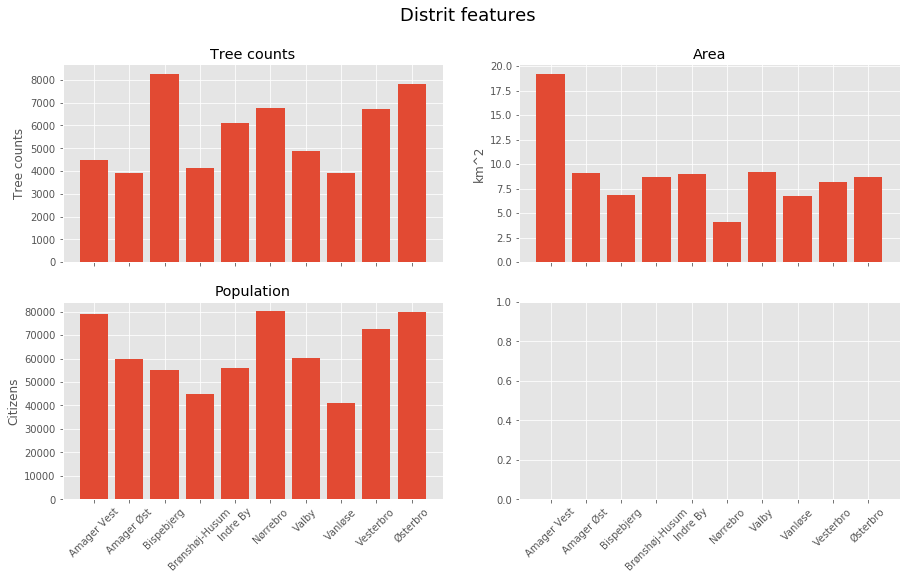

In [7]:
# Figure size
plt.rcParams['figure.figsize'] = (15, 8)

fig, axs = plt.subplots(2,2,sharex = 'col')
# Tree counts
axs[0,0].bar(df2['district'],df2['trees'])
axs[0,0].set_title("Tree counts")
axs[0,0].set_ylabel('Tree counts')
# Area ratio
axs[0,1].bar(df2['district'],df2['area'])
axs[0,1].set_title("Area")
axs[0,1].set_ylabel("km^2")
# Population ratio
axs[1,0].bar(df2['district'],df2['population'])
axs[1,0].set_title("Population")
axs[1,0].set_ylabel("Citizens")
# Income ratio
#axs[1,1].bar(df2['district'],df2['income'])
#axs[1,1].set_title('Income')
#axs[1,1].set_ylabel("[1000 DKK]")

axs[1,0].tick_params('x',labelrotation=45)
axs[1,1].tick_params('x',labelrotation=45)
plt.suptitle('Distrit features', size = 18)
plt.show()

The plot shows that Bispebjerg has the most amount of trees, closly followed by Østerbro while Amager Vest by far has the largest area in Copenhagen (important to remember here that we are ONLY looking at street trees and park trees handled by the Copenhagen municipality). The districts with the largest population are Amager Vest, Nørrebro and Østerbro. **OBS noget med kvadratmeter pris**. 

The problem however with these plots is that it is hard to compare them as they are in different plots which is not optimal for showing on a webpage. 

The plots gives a nice overview of how the "situation" is in Copenhagen but it takes up a lot of space and can be somewhat confusing. There for bokeh can be used to visualize all 4 plots in one barplot. However, as the plots are all on different scales they need to be put on the same scale to allow comparison. Therefor the values in the barplot are changed to percentage as this will keep the ratio for the individual barplots but allow them to be illustrated together.

In [8]:
# Population
df2['Population'] = (df2.population/sum(df2.population))*100
df2['Population'] = round(df2['Population'],1)
# Area
df2['Area'] = (df2.area/sum(df2.area))*100
df2['Area'] = round(df2['Area'],1)
# Trees
df2['Trees'] = (df2.trees/sum(df2.trees))*100
df2['Trees'] = round(df2['Trees'],1)
df2

,district,population,area,trees,Population,Area,Trees
9,Amager Vest,78973,19.2,4477,12.6,21.4,7.8
8,Amager Øst,59803,9.1,3930,9.5,10.1,6.9
7,Bispebjerg,55172,6.8,8268,8.8,7.6,14.5
6,Brønshøj-Husum,44784,8.7,4151,7.1,9.7,7.3
0,Indre By,55866,9.0,6105,8.9,10.0,10.7
2,Nørrebro,80254,4.1,6770,12.8,4.6,11.9
4,Valby,60308,9.2,4878,9.6,10.3,8.6
5,Vanløse,41195,6.7,3915,6.6,7.5,6.9
3,Vesterbro,72688,8.2,6710,11.6,9.1,11.8
1,Østerbro,79803,8.7,7835,12.7,9.7,13.7


In [9]:
# Import packages for plotting with Bokeh
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import Legend
from bokeh.palettes import all_palettes
output_notebook(resources=None, verbose=False, hide_banner=False, load_timeout=5000, notebook_type='jupyter')
from bokeh.models import ColumnDataSource, ranges, LabelSet, HoverTool

Loading BokehJS ...

In [10]:
# Construct the figure
p = figure(x_range=df2.district,plot_height=400,plot_width=650,
           y_range= ranges.Range1d(start=0,end=25))

# remove the grid
p.xgrid.grid_line_color=None
p.ygrid.grid_line_color=None
# Make sure bars stat at 0
p.y_range.start = 0
# Rotate the x-labels
p.xaxis.major_label_orientation = 0.5
# Remove - y-axis
p.yaxis.visible = False
# Remove the toolbar
p.toolbar_location=None
# Remove the grey box around the plot
p.outline_line_color = None

colors = ['#C5D699','#99BC66','#578300','#344F00','#1b3512']
bar = {}
items = []
color = 0
features = ['Population','Area','Trees']
for indx,i in enumerate(features):
    bar[i] = p.vbar(x='district', top=i, source=df2, muted=False,
                   width= 0.8, color=colors[color])
    items.append((i,[bar[i]]))
    color+=1
# Define legend
legend = Legend(items=items,location=(0,50))
# Add the hover tools - different for each item
p.add_tools(HoverTool(renderers=[items[1][1][0]], tooltips = [('Area','@area{0.0} km² (@Area{0.0}%)')]))
p.add_tools(HoverTool(renderers=[items[0][1][0]], tooltips = [('Population','@population (@Population{0.0}%)')]))
p.add_tools(HoverTool(renderers=[items[2][1][0]], tooltips = [('Trees','@trees (@Trees{0.0}%)')]))

# Set which bars to be invisible at the start
bar['Trees'].visible = False
bar['Area'].visible = False

p.add_layout(legend,'left')
p.legend.click_policy='hide'
show(p)

In the bokeh plot all features are showed in one single plot which saves a lot of spaces. By adding a hover tool the viewer can see the specific values if he/she finds it interesting. To the left side it is possible to switch between the features. It is decided to use the ``click_policy= 'hide'`` as it is feared that the muting function might cause confusion to the viewer. With the mute policy it can however be hard to compare the features, but by clicking and unclicking the desired features it is possible to get an idea. 

To dig further into the analysis it is look into how the features looked when factorizing in the amount of trees. To do this ratios are constructed for ``area``, ``population`` and ``XXX``:
- ``areaRatio`` - amount of trees pr. $km^2$.
- ``popRatio`` - tress pr. 100 citizens.
- ``XXXXXXXXXX``- XXxXXXXXX.

In [11]:
df2['popRatio'] = df2['trees']/(df2['population'])*100
df2['areaRatio'] = df2['trees']/df2['area']
#df2['incomeRatio'] = df2['trees']/df2['income']
df2

,district,population,area,trees,Population,Area,Trees,popRatio,areaRatio
9,Amager Vest,78973,19.2,4477,12.6,21.4,7.8,5.669026,233.177083
8,Amager Øst,59803,9.1,3930,9.5,10.1,6.9,6.571577,431.868132
7,Bispebjerg,55172,6.8,8268,8.8,7.6,14.5,14.985862,1215.882353
6,Brønshøj-Husum,44784,8.7,4151,7.1,9.7,7.3,9.268935,477.126437
0,Indre By,55866,9.0,6105,8.9,10.0,10.7,10.927935,678.333333
2,Nørrebro,80254,4.1,6770,12.8,4.6,11.9,8.435717,1651.219512
4,Valby,60308,9.2,4878,9.6,10.3,8.6,8.088479,530.217391
5,Vanløse,41195,6.7,3915,6.6,7.5,6.9,9.503581,584.328358
3,Vesterbro,72688,8.2,6710,11.6,9.1,11.8,9.231235,818.292683
1,Østerbro,79803,8.7,7835,12.7,9.7,13.7,9.817927,900.574713


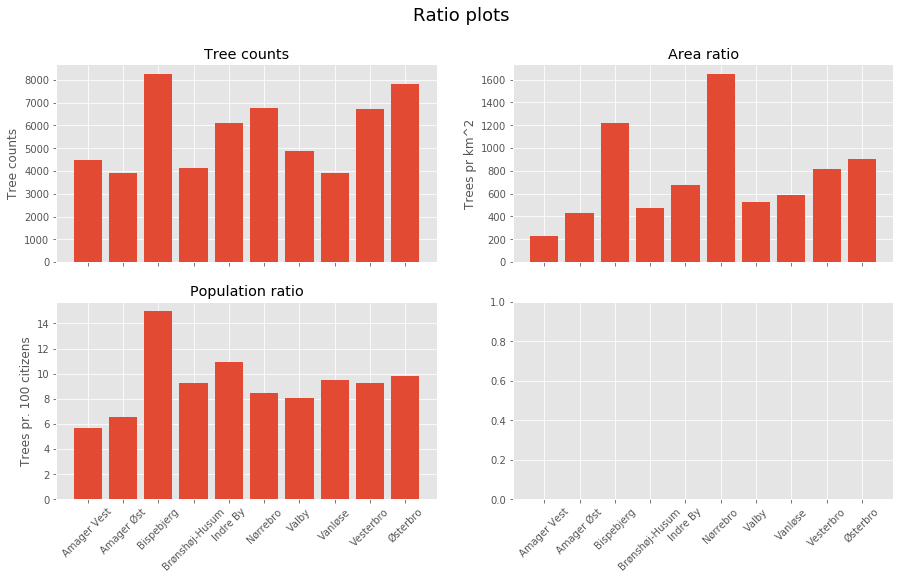

In [12]:
# Figure size
plt.rcParams['figure.figsize'] = (15, 8)

fig, axs = plt.subplots(2,2,sharex = 'col')
# Tree counts
axs[0,0].bar(df2['district'],df2['trees'])
axs[0,0].set_title("Tree counts")
axs[0,0].set_ylabel('Tree counts')
# Area ratio
axs[0,1].bar(df2['district'],df2['areaRatio'])
axs[0,1].set_title("Area ratio")
axs[0,1].set_ylabel("Trees pr km^2")
# Population ratio
axs[1,0].bar(df2['district'],df2['popRatio'])
axs[1,0].set_title("Population ratio")
axs[1,0].set_ylabel("Trees pr. 100 citizens")

# Income ratio
#axs[1,1].bar(df2['district'],df2['incomeRatio'])
#axs[1,1].set_title('Income ratio')
#axs[1,1].set_ylabel("Trees pr. 1000 DKK income")

axs[1,0].tick_params('x',labelrotation=45)
axs[1,1].tick_params('x',labelrotation=45)
plt.suptitle('Ratio plots', size = 18)
plt.show()

The plot shows that by factorizing in the trees the district with the most amount of trees pr. $km^2$ is Nørrebro , so if living in a district where the dinsity of the trees is high then Nørrebro is the best place. By inspecting the population ratio it can be seen that if having trees to yourself is more important then Bispebjerg is better as there are more than 14 trees pr. 100 citizens. **OBS noget om kvadratmeter pris**.

As each ratio is different it was decided that having all ratios in one plot as before might be confusing to the viewer. Therefor seperate plots are constructed for each ratio in bokeh.

In [13]:
# Plot for popRatio
source1 = ColumnDataSource(data=dict(district=df2.district,
                                   popRatio=df2.popRatio,
                                   popRatioStr=round(df2.popRatio,1)))

# Figure
p1 = figure(x_range=df2.district,plot_height=300,plot_width=500,
           y_range= ranges.Range1d(start=0,end=17),
           title="Trees pr. 100 citizens")

# Bar chart
colorcode_BBC = ['#C5D699','#99BC66','#578300','#344F00','#1b3512']
color = colorcode_BBC[2]
p1.vbar(x='district',top='popRatio',source = df2,width=0.9,color=color)

# remove the grid
p1.xgrid.grid_line_color=None
p1.ygrid.grid_line_color=None
# Make sure bars stat at 0
p1.y_range.start = 0
# Turn the x-labels
p1.xaxis.major_label_orientation = 0.5
# remove - y-axis
p1.yaxis.visible = False
# Remove the toolbar
p1.toolbar_location=None
# Remove the grey box around the plot
p1.outline_line_color = None
# Move the border of the left side to show "Amager"
p1.min_border_left = 30

# add labels
labels1 = LabelSet(x='district', y='popRatio', text='popRatioStr', level='glyph',
                  x_offset=-15, y_offset=0, source=source1, render_mode='canvas',
                  text_font_size="14pt")

# add hover tool
p1.add_tools(HoverTool(tooltips = [('Trees pr. 100 citizens','@popRatio{0.0}')]))

p1.add_layout(labels1)
show(p1)

In [14]:
# Plot for areaRatio
source2 = ColumnDataSource(data=dict(district=df2.district,
                                   areaRatio=df2.areaRatio,
                                   areaRatioStr=round(df2.areaRatio,0)))

# Figure
p2 = figure(x_range=df2.district,plot_height=300,plot_width=500,
           y_range= ranges.Range1d(start=0,end=1800),
           title="Trees pr. km²")

# Bar chart
p2.vbar(x='district',top='areaRatio',source = df2,width=0.9,color=color)

# remove the grid
p2.xgrid.grid_line_color=None
p2.ygrid.grid_line_color=None
# Make sure bars stat at 0
p2.y_range.start = 0
# Turn the x-labels
p2.xaxis.major_label_orientation = 0.5
# remove - y-axis
p2.yaxis.visible = False
# Remove the toolbar
p2.toolbar_location=None
# Remove the grey box around the plot
p2.outline_line_color = None
# Move the border of the left side to show "Amager"
p2.min_border_left = 30

# add labels
labels2 = LabelSet(x='district', y='areaRatio', text='areaRatioStr', level='glyph',
                  x_offset=-20, y_offset=0, source=source2, render_mode='canvas',
                  text_font_size="14pt")

# add hover tool
p2.add_tools(HoverTool(tooltips = [('Trees pr. km²','@areaRatio{0.0}')]))

p2.add_layout(labels2)
show(p2)

In the bokeh plots numbers are showed above the bars, this is done to add some diversity to the plots and to giver the viewer an understanding of the magnitude of the plots. Below the plots are gathedred into one plot.

In [15]:
from bokeh.layouts import column,row
from bokeh.layouts import gridplot
show(row(p1,p2))

Beneath the feature ``planteaar`` is explored.

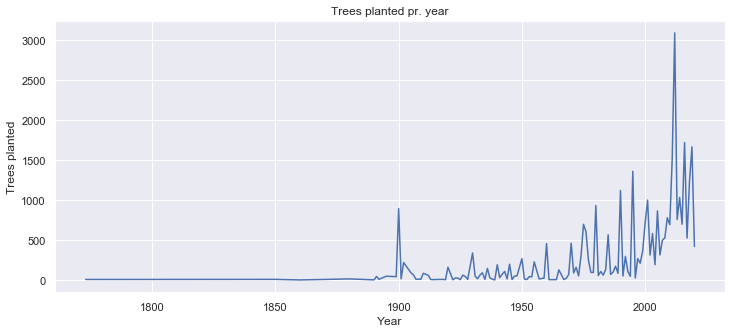

Percentage of trees with a unregistered plant year: 45.0 %


In [16]:
temp=np.unique(df['planteaar'],return_counts = True) # Get unique years with counts

#Plot
sns.set(rc={'figure.figsize':(12,5)}) #Fig size
allyear= temp[0][0:len(temp[0])-1] # Take all years but besides 'not registered'
yeartemp = [float(i) for i in allyear] # Convert year to float
plt.plot(yeartemp,temp[1][0:len(temp[1])-1])
#plt.axvline(x=2012, color='red')
plt.xlabel("Year")
plt.ylabel("Trees planted")
plt.title("Trees planted pr. year")
plt.show()
print("Percentage of trees with a unregistered plant year:", round(temp[1][-1]/sum(temp[1])*100,0),"%")

The plot shows when the trees in the dataset are planted, however 45% of the trees do not have a registered plant year which should be taken into account. The graph shows that up until 1900 not many trees are being planted (or at least have a registered plant year) but in 1900 almost 1000 trees are planted **HVORFOR VAR DET NU LIGE??**. Here after trees are regularly planted and the amount steadily increases by each year and peaks with more than 3000 trees in 2012. 

To see which districts have been invested in to add more trees the trees which have been planted from 2010 to 2020 are illustrated.

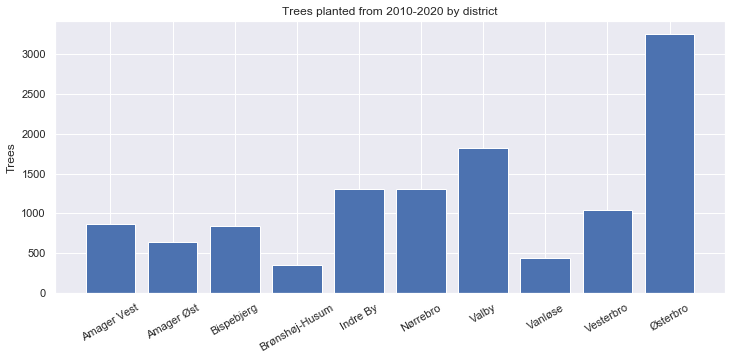

In [17]:
years = set(['2010.0','2011.0','2012.0','2013.0',
         '2014.0','2015.0','2016.0','2017.0','2018.0','2019.0','2020.0'])

temp = df[df['planteaar'].isin(years)]

byDis = temp.groupby(['bydelsnavn']).count()['id']
plt.bar(byDis.index,byDis.values)
plt.xticks(rotation=30)
plt.ylabel("Trees")
plt.title("Trees planted from 2010-2020 by district")
plt.show()

In [18]:
years = set(['2010.0','2011.0','2012.0','2013.0','2014.0',
             '2015.0','2016.0','2017.0','2018.0','2019.0','2020.0'])

temp = df[df['planteaar'].isin(years)] # Choosen only the selected years
byDis = temp.groupby(['bydelsnavn']).count()['id'] # Group by the district
temp = pd.DataFrame(columns=['district','trees'])
temp['district'] = byDis.index
temp['trees'] = byDis.values
temp = temp.sort_values('trees',ascending=True)

source = ColumnDataSource(data=dict(district=temp.district,
                                   trees=temp.trees))

## Make the figure
colorcode_BBC = ['#C5D699','#99BC66','#578300','#344F00','#1b3512']
color = colorcode_BBC[2]

p = figure(y_range=temp['district'], plot_height = 300,
          plot_width=700,x_range=ranges.Range1d(start=0,end=3550))
p.hbar(y='district',right='trees', source=temp, height=0.8,color=color)

# remove the grid
p.xgrid.grid_line_color=None
p.ygrid.grid_line_color=None
# Make sure bars stat at 0
p.x_range.start = 0
# remove - y-axis
p.xaxis.visible = False
# Remove the toolbar
p.toolbar_location=None
# Remove the grey box around the plot
p.outline_line_color = None

# add hover tool
p.add_tools(HoverTool(tooltips = [('Trees','@trees')]))

# add labels
labels = LabelSet(y='district',x='trees',text='trees',level='glyph',
                  x_offset=3,y_offset=-10,text_font_size="14pt",
                  source=source)
p.add_layout(labels)

show(p)

# Maps

This section explores the dataframes ``df_cph`` and ``df``. The purpose of this is to visualize how the trees are distributed across the municiplality of Copenhagen by using Bokeh. 

Initially a map of the districts are produced. 

In [19]:
# Merge population, area and number of trees together with shapefiles
temp = pd.merge(df_cph,df2,on='district')

# Add the procentage for all features in every neighbouhood
p_population =  temp['population']/sum(temp['population'])*100
temp['p_population']=p_population
p_area = temp['area']/sum(temp['area'])*100
temp['p_area']=p_area
p_trees = temp['trees']/sum(temp['trees'])*100
temp['p_trees']=p_trees

# Adding the center coordinates of the districts
#for i in range(len(df_cph)):
#    center_X= df_cph.loc[i,'geometry'].centroid.coords[0][0]
#    center_Y= df_cph.loc[i,'geometry'].centroid.coords[0][1]
#df_cph['center_X'] = center_X
#df_cph['center_Y'] = center_Y

df_cph = temp

In [20]:
df_cph

,bydel_nr,district,geometry,population,area,trees,Population,Area,Trees,popRatio,areaRatio,p_population,p_area,p_trees
0,1,Indre By,"POLYGON ((12.61149 55.69763, 12.61534 55.69783...",55866,9.0,6105,8.9,10.0,10.7,10.927935,678.333333,8.883892,10.033445,10.703203
1,2,Østerbro,"POLYGON ((12.61591 55.72065, 12.62000 55.72348...",79803,8.7,7835,12.7,9.7,13.7,9.817927,900.574713,12.690388,9.698997,13.736216
2,5,Valby,"POLYGON ((12.52434 55.66666, 12.52449 55.66668...",60308,9.2,4878,9.6,10.3,8.6,8.088479,530.217391,9.590265,10.256410,8.552043
3,4,Vesterbro,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",72688,8.2,6710,11.6,9.1,11.8,9.231235,818.292683,11.558951,9.141583,11.763881
4,9,Amager Øst,"POLYGON ((12.63094 55.67050, 12.63126 55.67028...",59803,9.1,3930,9.5,10.1,6.9,6.571577,431.868132,9.509960,10.144928,6.890023
5,7,Brønshøj-Husum,"POLYGON ((12.46894 55.69976, 12.46698 55.70024...",44784,8.7,4151,7.1,9.7,7.3,9.268935,477.126437,7.121616,9.698997,7.277477
6,3,Nørrebro,"POLYGON ((12.56165 55.69667, 12.56152 55.69636...",80254,4.1,6770,12.8,4.6,11.9,8.435717,1651.219512,12.762107,4.570792,11.869072
7,8,Bispebjerg,"POLYGON ((12.51594 55.70664, 12.51539 55.70693...",55172,6.8,8268,8.8,7.6,14.5,14.985862,1215.882353,8.773531,7.580825,14.495345
8,6,Vanløse,"POLYGON ((12.46894 55.69976, 12.46935 55.69965...",41195,6.7,3915,6.6,7.5,6.9,9.503581,584.328358,6.550888,7.469342,6.863725
9,10,Amager Vest,"POLYGON ((12.58271 55.66850, 12.58661 55.66783...",78973,19.2,4477,12.6,21.4,7.8,5.669026,233.177083,12.558401,21.404682,7.849016


We can now convert the data of the districts to a format that is conducive to mapping.

In [21]:
from bokeh.models import (GeoJSONDataSource,LinearColorMapper)
import json

# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = df_cph.to_json())

Loading BokehJS ...

Correct format, now ready to plot in Bokeh.

Define the colorbar for number of trees for first bokeh map

In [22]:
from bokeh.models import (LinearColorMapper, ColorBar)
# Specify the colorcodes
colorcode_BBC = ['#C5D699','#99BC66','#578300','#344F00','#1b3512']

# Transform it to a color map
color_mapper2 = LinearColorMapper(palette = colorcode_BBC, low = 3000, high = 8000)

# Define custom tick labels for color bar.
tick_labels = {#'0': '0', '1000': '1000','2000':'2000',
 '3000':'3000',
 '4000':'4000', '5000':'5000','6000':'6000','7000':'7000','8000':'8000+'}

# Create color bar.
color_bar2 = ColorBar(color_mapper = color_mapper2, 
                     label_standoff = 8,
                     width = 750, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',
                     major_label_overrides = tick_labels,
                     title = 'Amount of trees in district')

In [23]:
# Create figure object.
p = figure(title = 'Trees in the Copenhagen municipality',
           title_location = 'above',
           plot_height = 800 ,
           plot_width = 800, 
           toolbar_location = 'above',
           tools = 'pan, wheel_zoom, box_zoom, reset',
           aspect_scale=0.05)

# Change font size on title
p.title.text_font_size = '20pt'

p.axis.visible = False
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Add patch renderer to figure.
neighbourhoods = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'trees',
                                 'transform' : color_mapper2},
                   line_color = 'black', 
                   line_width = 0.75, 
                   fill_alpha = 1)

# Create hover tool
p.add_tools(HoverTool(renderers = [neighbourhoods],
                      tooltips = [('Neighbourhood','@district'),
                                 ('Population',' @population (@p_population{0.0}%)'),
                                 ('Trees','@trees (@p_trees{0.0}%)'),
                                 ('Area','@area{0.0} km² (@p_area{0.0}%)')]))

# Add colorbar 
p.add_layout(color_bar2, 'below')

# Remove bokeh logo
p.toolbar.logo = None

# Remove the grey box around the plot
p.outline_line_color = None

show(p)

## Genre
**FROM PROJECT DESCRIPTION:** Which genre of data story did you use? Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

## Visualization
**FROM PROJECT DESCRIPTION:** Explain the visualizations you've chosen. Why are they right for the story you want to tell?

## Discussion 
**FROM PROJECT DESCRIPTION:** Think critically about your creation. What went well? What is still missing? What could be improved?, Why?

## Contribution
**FROM PROJECT DESCRIPTION:** You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
It is not OK simply to write "All group members contributed equally".